#  code=7

In [1]:
# saveing model

In [2]:
# import modeles
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras   #using keras libraray we can build cnn


# loading data

In [3]:
import tensorflow.keras as tk #to download dataset from keras database
# download dataset txain and test data set from keras database
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

# to store the labels of the data

In [4]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","coat","Sandel","Shirt","Sneaker","Bag","Ankle boot"]
# this if the list of labels

# change the dimention. CNN input data should in 4Dimentional

In [5]:
# we have to convert our data in to 4 dimention 
# because cnn model need in 4D to train

# througn .expand_dims() method we can change the dimention of data or an array
x_train=np.expand_dims(x_train, -1)       #takes first argument dataset and 
                                          #second argument is rows and columns in array   
# x_test=np.expand_dims(x_test, -1)   

# feature scaling

In [6]:
# before sacling we have data between 0 to 255 
# after sacling we will get data between 0 to 1 by dividing each and every cell with 255

x_train= x_train/255
x_test= x_test/255

print("after scaling*********************************************************")
print(x_train[0])

after scaling*********************************************************
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

# validation data to train while traning

In [7]:
# we have to split some data from traning data to test model while traning
# to get validation data

# we have to import sklearn sub module
from sklearn.model_selection import train_test_split #to split data
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

# shape of x_val and y_val
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


# building convolutional Neural Network

In [8]:
# To build cnn model we have to import kesar library
# And then load models from keras
# and the call the sequential() method
# we have to put several layers inside sequential layer

model=keras.models.Sequential([
#     adding first layer means using dataset we will perforn convolutional operation
#     convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="valid", activation="relu", input_shape=[28,28,1]),
# second layer
#     max pooling
    keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling
# 3rd layer
    keras.layers.Flatten(), #this will flatten every image in single vector
    
#     to train neural networ we have to use dense layer
#     input layer
    keras.layers.Dense(units=128 , activation="relu"),
    
#     output layer
    keras.layers.Dense(units=10 , activation="softmax"),
    
])

# to check the summery of the model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

# to complie model

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# train model

In [11]:
# to train model we have to write name of model and fit function
# we have to pass two parameters
model.fit(x_train,y_train , epochs=10, batch_size=512,verbose=1, validation_data=(x_val,y_val))


Epoch 1/10
94/94 [==============================] - 18s 176ms/step - loss: 0.6375 - accuracy: 0.7829 - val_loss: 0.4451 - val_accuracy: 0.8453
Epoch 2/10
94/94 [==============================] - 23s 240ms/step - loss: 0.3785 - accuracy: 0.8691 - val_loss: 0.3565 - val_accuracy: 0.8773
Epoch 3/10
94/94 [==============================] - 11s 121ms/step - loss: 0.3332 - accuracy: 0.8838 - val_loss: 0.3471 - val_accuracy: 0.8802
Epoch 4/10
94/94 [==============================] - 9s 96ms/step - loss: 0.2988 - accuracy: 0.8944 - val_loss: 0.3077 - val_accuracy: 0.8914
Epoch 5/10
94/94 [==============================] - 8s 89ms/step - loss: 0.2778 - accuracy: 0.9016 - val_loss: 0.3026 - val_accuracy: 0.8938
Epoch 6/10
94/94 [==============================] - 8s 90ms/step - loss: 0.2614 - accuracy: 0.9084 - val_loss: 0.2951 - val_accuracy: 0.8963
Epoch 7/10
94/94 [==============================] - 8s 90ms/step - loss: 0.2473 - accuracy: 0.9120 - val_loss: 0.2910 - val_accuracy: 0.8984
Epoch 8

# test the model

In [12]:
# model.predict(x_test[0]) #this will occur the error
# we have to give 4 dimention data to model 
# x_test=np.expand_dims(x_test, axis=0) #now this ie 4 dimention data we can assign to model

model.predict(np.expand_dims(x_test[0], axis=0)).round(2)
# the below array discribe the labels to match with 
# the item at index[0] relates the 9 label and model is 99% sure about it.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

# to find maximum predicted value out of all predictions according to labels

In [13]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

y_test[0] # cross checking this is actual label of the item intest data at [0] index 

# test on may images from test dataset
y_pred=model.predict(x_test).round(2)
y_pred


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.08, 0.05, 0.  ]], dtype=float32)

# evalute model with (x_test,y_test)

In [14]:
# to check the accuracy of model at test dataset
model.evaluate(x_test, y_test)
# 89.48% accuracy this means our model is good to diliver
# not over fitting not under fitting

313/313 [==============================] - 1s 3ms/step - loss: 0.2819 - accuracy: 0.8974


[0.2819499969482422, 0.8974000215530396]

# Visualize output

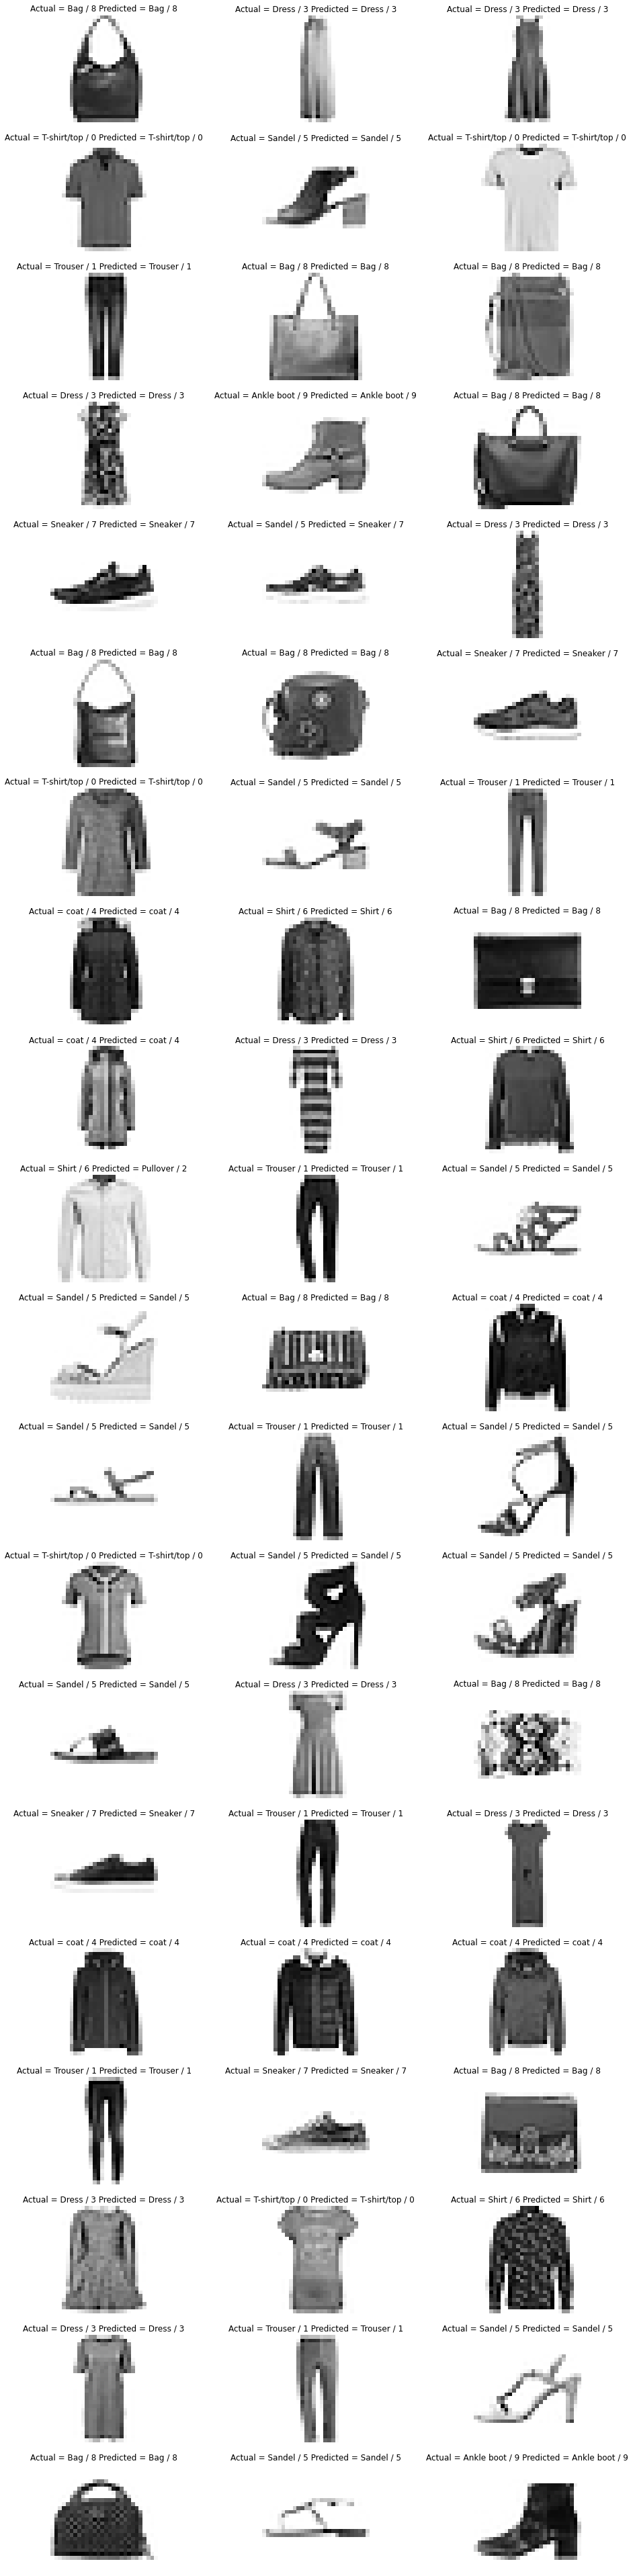

In [15]:
plt.figure(figsize=(16,70))
j=1
for i in np.random.randint(0,10000,60):
    plt.subplot(20,3,j); j +=1
    plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
    plt.title("Actual = {} / {} Predicted = {} / {}".format(class_labels[y_test[i]], y_test[i],class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

# confusion matrix  

<AxesSubplot:>

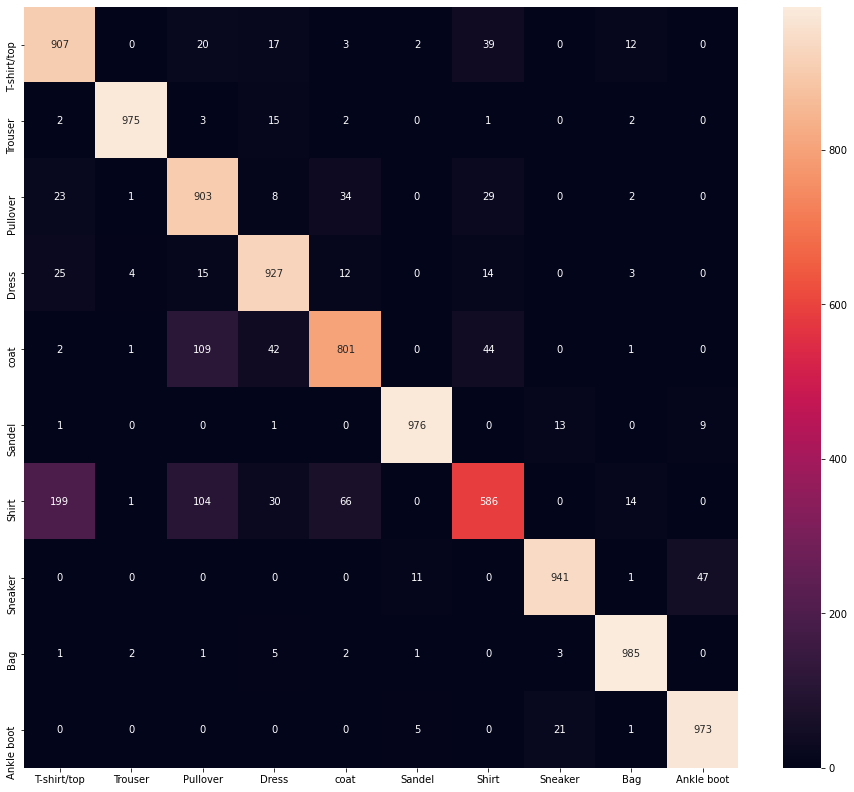

In [16]:
#  to draw confusion matrix we have to import sklearn library
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,14))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

# to show confusion matrix
sns.heatmap(cm , annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# classification report

In [17]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.91      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.90      0.84      1000
       Dress       0.89      0.93      0.91      1000
        coat       0.87      0.80      0.83      1000
      Sandel       0.98      0.98      0.98      1000
       Shirt       0.82      0.59      0.68      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



# save model

In [18]:
#  in deep learning we donot need any library to save model
# in machine learing like decision tree n svm ets need some libraries to save model

In [19]:
model.save("my_first_cnn_model.h5") #we have to add .5 extention with model name
# in this case the model is saved within the same folder where this code file exist

# to save a model in specific folder

In [20]:
model.save("E:\my_first_cnn_model.h5") 

# to load model

In [21]:
myOwnModel= keras.models.load_model("E:\my_first_cnn_model.h5") #function to load model

In [22]:
# to checking weather the model is working correctly or not
myOwnModel.predict(x_test).round(2)


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.08, 0.05, 0.  ]], dtype=float32)

# predict single value

In [23]:
myOwnModel.predict(np.expand_dims(x_test[0] , axis=0)).round(2) #we have to give 4 dimention data to cnn model we have converted into 4 dims here

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

# to find mam value in the array

9